In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

In [6]:
# Create an empty list to store the DataFrames
dfs = []

N_sims = 15

# Loop through the file names
for i in range(1, N_sims + 1):
    file_name = f'../data/data_endogenouswage/values_estimation_production_{i}.csv'  # Assuming the files are in CSV format
    
    # Read the file as a DataFrame
    df = pd.read_csv(file_name)
    
    # Add a simulation number column
    df['simulation_number'] = i
    
    # Append the DataFrame to the list
    dfs.append(df)

# Concatenate all the DataFrames into one
combined_df = pd.concat(dfs, ignore_index=True)

In [7]:


print(combined_df)

      bl_ols    bk_ols  bl_xtreg  bk_xtreb  bk_acfest  bl_acfest     bl_op  \
0   0.606467  0.440534  0.625225  0.350476   1.244658   1.732292  0.600020   
1   0.612952  0.515256  0.676502  0.403085   1.740513   2.112899  0.599957   
2   0.622559  0.422305  0.673709  0.313464   1.297127   1.921700  0.600020   
3   0.612071  0.440157  0.650357  0.292757   1.277801   1.794741  0.600015   
4   0.626053  0.471568  0.784322  0.300166   1.224836   1.634059  0.599920   
5   0.603155  0.540910  0.644302  0.475047   1.618281   1.806713  0.599993   
6   0.605118  0.456703  0.623158  0.379106   1.394059   1.859277  0.600008   
7   0.610177  0.457995  0.696206  0.296383   1.143649   1.531098  0.600006   
8   0.603420  0.472633  0.614570  0.389052   1.434879   1.832146  0.600005   
9   0.605874  0.546198  0.630055  0.461464   0.492388   0.604544  0.600000   
10  0.602929  0.472592  0.626584  0.426029   1.364084   1.758589  0.600001   
11  0.607498  0.491441  0.628793  0.415090   1.876014   2.305962

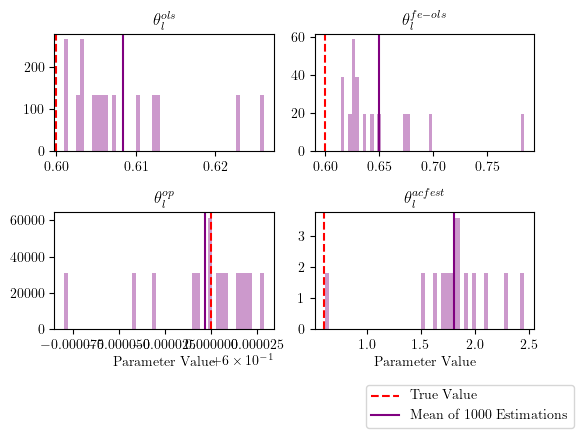

In [8]:

fig, ax = plt.subplots(2, 2, figsize=(6, 5))

purple_color = 'purple'

ax[0, 0].hist(combined_df['bl_ols'], bins=50, density=True, color=purple_color, alpha=0.4)
ax[0, 0].axvline(0.6, color='red', linestyle='dashed')
ax[0, 0].axvline(np.mean(combined_df['bl_ols']), color=purple_color)
ax[0, 0].set_title('$\\theta_{l}^{ols}$')

ax[0, 1].hist(combined_df['bl_xtreg'], bins=50, density=True, color=purple_color, alpha=0.4)
ax[0, 1].axvline(0.6, color='red', linestyle='dashed')
ax[0, 1].axvline(np.mean(combined_df['bl_xtreg']), color=purple_color)
ax[0, 1].set_title('$\\theta_{l}^{fe-ols}$')

ax[1, 0].hist(combined_df['bl_op'], bins=50, density=True, color=purple_color, alpha=0.4)
ax[1, 0].axvline(0.6, color='red', linestyle='dashed')
ax[1, 0].axvline(np.mean(combined_df['bl_op']), color=purple_color)
ax[1, 0].set_title('$\\theta_{l}^{op}$')
ax[1, 0].set_xlabel('Parameter Value')


ax[1, 1].hist(combined_df['bl_acfest'], bins=50, density=True, color=purple_color, alpha=0.4)
ax[1, 1].axvline(0.6, color='red', linestyle='dashed')
ax[1, 1].axvline(np.mean(combined_df['bl_acfest']), color=purple_color)
ax[1, 1].set_title('$\\theta_{l}^{acfest}$')
ax[1, 1].set_xlabel('Parameter Value')

legend_elements = [
    plt.Line2D([0], [0], color='red', linestyle='dashed', label='True Value'),
    plt.Line2D([0], [0], color=purple_color, label='Mean of 1000 Estimations')]
leg = plt.legend(handles=legend_elements,
            loc='lower left',
            bbox_to_anchor=(0.2, -0.9))

# fig.subplots_adjust(bottom=0.78)
plt.tight_layout()

plt.savefig('../plots/estimation_results_production_side.pdf')
plt.show()